In [1]:
import os
os.chdir('..')

from train.TrainPNO4D import PNO4D, smooth_chi
from train.utilities import *
from scipy.io import loadmat
from planner import*


Load Model

In [2]:
modes = 3
width = 7
nlayers = 1

# Change Dataset path and Model Path
dataset_path = os.path.expanduser('~/Documents/Existensial Robotics Lab/Planning_Operator/4D_experiments/dataset')
model_path = os.path.expanduser(dataset_path + '/manipulator/planningoperator_manipulator17_m3_w8_l1_b10_lr3e-3_10g_20nov/n400_lr1.000000e-02_gamma6.000000e-01_wd3.000000e-06_seed5/model4d.ckpt'
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_pno_model(ckpt_path=model_path,modes=modes, width=width, nlayers=nlayers, device=device)
model.to(device)

/home/sharath/anaconda3/envs/neuraloperator/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


PlanningOperator4D(
  (fc0): Linear(in_features=4, out_features=7, bias=True)
  (conv0): SpectralConv4d()
  (w0): Conv4d(
    (conv3d_layers): ModuleList(
      (0): Conv3d(7, 7, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
    )
  )
  (fc1): DeepNormMetric(
    (Us): ModuleList(
      (0-1): 2 x Linear(in_features=7, out_features=128, bias=False)
    )
    (Ws): ModuleList(
      (0): ConstrainedLinear(in_features=128, out_features=128, bias=False)
    )
    (activation): MaxReLUPairwiseActivation(
      (avg_pool): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    )
    (output_activation): ConcaveActivation()
    (reduce_metric): ReduceMetric()
  )
)

Load Maps

In [3]:
maps = loadmat(os.path.join(dataset_path, 'occupancyGridsSphere.mat'))
occupancygrids = 1 - maps['occupancyGrids']
obstaclepositions = maps['blockPositions']
testmaps = occupancygrids#Unseen Maps
testobstaclepositions = obstaclepositions


Infer Value function and generate path

In [4]:
test_idx = 14

teststart = np.array([0, 3, 5, 8])
testgoal = np.array([3, 3, 5, 8])

testmap = testmaps[test_idx,:,:,:,:].squeeze()
testobstaclepositions = obstaclepositions[test_idx,:,:]
valuefunction =  getPNOValueFunction(testmap, testgoal, model)
success, path_length, path = perform_gradient_descent(valuefunction, teststart, testgoal)
print("Success:",success, ",Path Length:", path_length)


Success: True ,Path Length: 3.0


Plot Value Function Slices

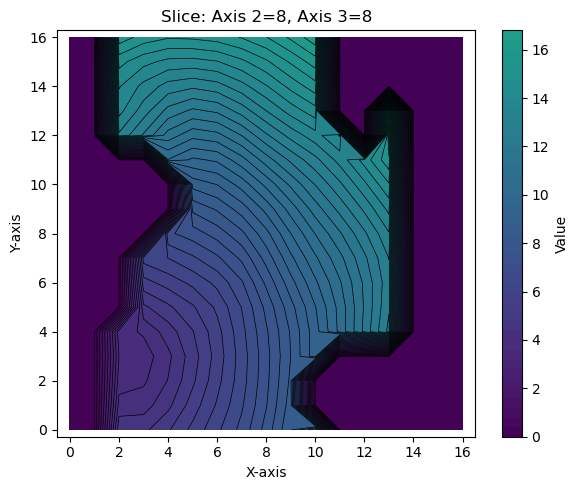

In [5]:
plot_value_function_with_contours(valuefunction, occupancy_map=testmap, slice_axis_1=2, index_1=8, slice_axis_2=3, index_2=8, levels=50)